以下为AI生成内容，仅供参考，不允许未经评估直接将生成内容植入工作输出件中。

好的，我可以帮你构建一个使用PyTorch的RNN模型，并使用一段歌词来训练它。

首先，你需要安装PyTorch库。你可以使用以下命令来安装：

```
pip install torch
```

接下来，我们将导入所需的库和模块：

```python
import torch
import torch.nn as nn
import torch.optim as optim
```

#然后，定义一个RNN模型类：

```python
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        embedded = self.embedding(input)
        output, hidden = self.rnn(embedded.view(1, 1, -1))
        output = self.fc(output.view(1, -1))
        return output, hidden
```

接下来，我们将定义一些辅助函数来处理输入数据和训练模型：

```python
def char_to_tensor(char, all_chars):
    tensor = torch.zeros(1, len(all_chars))
    tensor[0][all_chars.index(char)] = 1
    return tensor

def lyrics_to_tensor(lyrics, all_chars):
    tensor = torch.zeros(len(lyrics), 1, len(all_chars))
    for i, char in enumerate(lyrics):
        tensor[i][0][all_chars.index(char)] = 1
    return tensor

def train(model, lyrics_tensor, criterion, optimizer):
    hidden = model.init_hidden()

    model.zero_grad()

    loss = 0

    for i in range(lyrics_tensor.size()[0] - 1):
        input_char = lyrics_tensor[i]
        target_char = lyrics_tensor[i + 1]

        output, hidden = model(input_char)
        loss += criterion(output, target_char)

    loss.backward()
    optimizer.step()

    return loss.item() / (lyrics_tensor.size()[0] - 1)
```

现在，我们可以开始训练模型了。首先，我们需要准备训练数据。假设我们有一段歌词如下：

```python
lyrics = "I'm singing in the rain, just singing in the rain"
```

我们需要将歌词转换为张量形式：

```python
all_chars = list(set(lyrics))
n_chars = len(all_chars)

lyrics_tensor = lyrics_to_tensor(lyrics, all_chars)
```

接下来，我们可以定义模型的超参数，并创建模型实例：

```python
input_size = n_chars
hidden_size = 128
output_size = n_chars

model = RNN(input_size, hidden_size, output_size)
```

然后，我们可以定义损失函数和优化器：

```python
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
```

最后，我们可以开始训练模型：

```python
n_epochs = 1000

for epoch in range(1, n_epochs + 1):
    loss = train(model, lyrics_tensor, criterion, optimizer)
    print(f"Epoch: {epoch}, Loss: {loss:.4f}")
```

这样，我们就完成了使用PyTorch的RNN模型来训练歌词的过程。你可以根据自己的需要调整模型的超参数和训练的轮数。希望对你有帮助！

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        embedded = self.embedding(input)
        output, hidden = self.rnn(embedded.view(1, 1, -1))
        output = self.fc(output.view(1, -1))
        return output, hidden
    def init_hidden(self, batch_size):
        return torch.zeros(batch_size, self.hidden_size)

In [26]:
def char_to_tensor(char, all_chars):
    tensor = torch.zeros(1, len(all_chars))
    tensor[0][all_chars.index(char)] = 1
    return tensor

def lyrics_to_tensor(lyrics, all_chars):
    tensor = torch.zeros(len(lyrics), 1, len(all_chars))
    for i, char in enumerate(lyrics):
        tensor[i][0][all_chars.index(char)] = 1
    return tensor

def train(model, lyrics_tensor, criterion, optimizer):
    hidden = model.init_hidden(1)

    model.zero_grad()

    loss = 0

    for i in range(lyrics_tensor.size()[0] - 1):
        input_char = lyrics_tensor[i]
        print(input_char.size())
        target_char = lyrics_tensor[i + 1]

        output, hidden = model(input_char)
        loss += criterion(output, target_char)

    loss.backward()
    optimizer.step()

    return loss.item() / (lyrics_tensor.size()[0] - 1)

In [27]:
lyrics = "I'm singing in the rain, just singing in the rain"

In [28]:
all_chars = list(set(lyrics))
n_chars = len(all_chars)

lyrics_tensor = lyrics_to_tensor(lyrics, all_chars)

In [29]:
input_size = n_chars
hidden_size = 128
output_size = n_chars

model = RNN(input_size, hidden_size, output_size)

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [31]:
n_epochs = 1000

for epoch in range(1, n_epochs + 1):
    loss = train(model, lyrics_tensor, criterion, optimizer)
    print(f"Epoch: {epoch}, Loss: {loss:.4f}")

torch.Size([1, 16])


RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

In [3]:
import sys
import os
os.chdir('/home/ma-user/work/dev/easy-nlp-main/docs/chapter1/d2l/d2l/')
from d2l import *

In [49]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [45]:
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [80]:
vocab

In [46]:
for X,Y in train_iter:
    print(X,Y)
    break

tensor([[ 5, 13,  2,  ..., 15,  7,  6],
        [11, 20,  4,  ...,  8,  1, 21],
        [ 4,  6, 11,  ...,  8,  1,  7],
        ...,
        [ 6, 26, 14,  ...,  3, 21,  2],
        [ 8,  3,  4,  ...,  3,  1, 21],
        [ 2, 15,  9,  ...,  4,  6, 11]]) tensor([[13,  2,  1,  ...,  7,  6, 22],
        [20,  4,  8,  ...,  1, 21,  2],
        [ 6, 11,  1,  ...,  1,  7, 22],
        ...,
        [26, 14, 10,  ..., 21,  2, 16],
        [ 3,  4, 12,  ...,  1, 21,  2],
        [15,  9,  4,  ...,  6, 11,  1]])


In [23]:
X.shape

torch.Size([32, 35])

In [24]:
Y.shape

torch.Size([32, 35])

In [4]:
vocab

In [48]:
num_hiddens = 256
rnn_layer = nn.RNN(len(vocab), num_hiddens)

In [26]:
class RNNLayer(nn.Module):
    def __init__(self,input_size, hidden_size, num_layers=1, batch_first=True):
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.input_size = input_size
        self.bidirectional = False
        super().__init__()
        self.W_ih = nn.Parameter(torch.rand(self.input_size, self.hidden_size))
        self.W_hh = nn.Parameter(torch.rand(self.hidden_size, self.hidden_size))
        self.b_ih = nn.Parameter(torch.zeros(self.hidden_size))
        self.b_hh = nn.Parameter(torch.zeros(self.hidden_size))
        
    def forward(self,x_t,h_prev=None):
        if h_prev == None:
             h_prev = torch.zeros( x_t.size(0), self.hidden_size)
        output = torch.tanh(torch.matmul(x_t, self.W_ih) + self.b_ih + torch.matmul(h_prev, self.W_hh) + self.b_hh)
        return output,output[:,-1,:].unsqueeze(0)
        

In [ ]:
voc

In [39]:
num_hiddens = 256
# rnn_layer = nn.LSTM(input_size=vocab_size, hidden_size=num_hiddens) # 已测试
rnn_layer = RNNLayer(input_size=len(vocab), hidden_size=num_hiddens)

In [43]:
state = torch.zeros((1, batch_size, num_hiddens))
state.shape

torch.Size([1, 32, 256])

In [47]:
X = torch.rand(size=(num_steps, batch_size, len(vocab)))
Y, state_new = rnn_layer(X, state)
Y.shape, state_new.shape

RuntimeError: Expected hidden size (1, 35, 256), got [1, 32, 256]

In [40]:
X = F.one_hot(X.T.long(), len(vocab))
X = X.to(torch.float32)
rnn_layer(X,state)

/tmp/ipykernel_830691/2968982598.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  X = F.one_hot(X.T.long(), len(vocab))


RuntimeError: The size of tensor a (35) must match the size of tensor b (32) at non-singleton dimension 2

In [38]:
state.size()

torch.Size([1, 32, 256])

In [34]:

class RNNModel(nn.Module):
    """循环神经网络模型"""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        # 如果RNN是双向的（之后将介绍），num_directions应该是2，否则应该是1
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)
    def forward(self, inputs, state):
        X = F.one_hot(inputs.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        pritn(state.size)
        # 全连接层首先将Y的形状改为(时间步数*批量大小,隐藏单元数)
        # 它的输出形状是(时间步数*批量大小,词表大小)。
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, state
    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # nn.GRU以张量作为隐状态
            return torch.zeros((self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens),
                device=device)
        else:
            # nn.LSTM以元组作为隐状态
            return (torch.zeros((
                self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens), device=device),
                torch.zeros((
                self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens), device=device))

In [29]:
device = d2l.try_gpu()
net = RNNModel(rnn_layer, vocab_size=len(vocab))
net = net.to(device)
d2l.predict_ch8('time traveller', 10, net, vocab, device)

'time travellerllllllllll'

RuntimeError: Can't detach views in-place. Use detach() instead. If you are using DistributedDataParallel (DDP) for training, and gradient_as_bucket_view is set as True, gradients are views of DDP buckets, and hence detach_() cannot be called on these gradients. To fix this error, please refer to the Optimizer.zero_grad() function in torch/optim/optimizer.py as the solution.

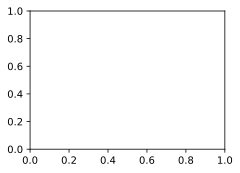

In [30]:
num_epochs, lr = 500, 1
d2l.train_ch8(net, train_iter, vocab, lr, num_epochs, device)

In [33]:
device = 'cuda:0'
net = RNNModel(rnn_layer, vocab_size=len(vocab))
net = net.to(device)
d2l.predict_ch8('time traveller', 10, net, vocab, device)

NameError: name 'rnn_layer' is not defined

# try3

In [50]:
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [73]:
32*35

1120

In [51]:
F.one_hot(torch.tensor([0, 2]), len(vocab))

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])

In [52]:
X = torch.arange(10).reshape((2, 5))
F.one_hot(X.T, 28).shape

torch.Size([5, 2, 28])

In [72]:
for X,Y in train_iter:
    print(X.shape,Y.shape)

torch.Size([32, 35]) torch.Size([32, 35])
torch.Size([32, 35]) torch.Size([32, 35])
torch.Size([32, 35]) torch.Size([32, 35])
torch.Size([32, 35]) torch.Size([32, 35])
torch.Size([32, 35]) torch.Size([32, 35])
torch.Size([32, 35]) torch.Size([32, 35])
torch.Size([32, 35]) torch.Size([32, 35])
torch.Size([32, 35]) torch.Size([32, 35])


In [54]:
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01
    # 隐藏层参数
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = torch.zeros(num_hiddens, device=device)
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # 附加梯度
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

In [55]:
def init_rnn_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

In [56]:
def rnn(inputs, state, params):
    # inputs的形状：(时间步数量，批量大小，词表大小)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # X的形状：(批量大小，词表大小)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
        Y = torch.mm(H, W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)

In [57]:
class RNNModelScratch: #@save
    """从零开始实现的循环神经网络模型"""
    def __init__(self, vocab_size, num_hiddens, device,
        get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn
    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)
    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)

In [58]:
num_hiddens = 512
net = RNNModelScratch(len(vocab), num_hiddens, d2l.try_gpu(), get_params,
init_rnn_state, rnn)
state = net.begin_state(X.shape[0], d2l.try_gpu())
Y, new_state = net(X.to(d2l.try_gpu()), state)
Y.shape, len(new_state), new_state[0].shape

(torch.Size([10, 28]), 1, torch.Size([2, 512]))

In [76]:
def predict_ch8(prefix, num_preds, net, vocab, device): #@save
    """在prefix后面生成新字符"""
    state = net.begin_state(batch_size=1, device=device)
    outputs = [vocab[prefix[0]]]
    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape((1, 1))
    for y in prefix[1:]: # 预热期
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
    for _ in range(num_preds): # 预测num_preds步
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

In [78]:
def predict_ch8(prefix, num_preds, net, vocab, device):
    """在prefix后面生成新字符

    Defined in :numref:`sec_rnn_scratch`"""
    state = net.begin_state(batch_size=1, device=device)
    outputs = [vocab[prefix[0]]]
    get_input =  lambda: torch.tensor([outputs[-1]], device=device).reshape((1, 1))
    for y in prefix[1:]:  # 预热期
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
    for _ in range(num_preds):  # 预测num_preds步
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

In [79]:
predict_ch8('time traveller ', 10, net, vocab, d2l.try_gpu())

'time traveller for so it '

In [61]:
def grad_clipping(net, theta): #@save
    """裁剪梯度"""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
        norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

In [63]:
#@save
def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """训练网络一个迭代周期（定义见第8章）"""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2) # 训练损失之和,词元数量
    for X, Y in train_iter:
        if state is None or use_random_iter:
        # 在第一次迭代或使用随机抽样时初始化state
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
            # state对于nn.GRU是个张量
                state.detach_()
            else:
            # state对于nn.LSTM或对于我们从零开始实现的模型是个张量
                for s in state:
                    s.detach_()
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        l = loss(y_hat, y.long()).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # 因为已经调用了mean函数
            updater(batch_size=1)
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

In [71]:
num_epochs, lr = 500, 1
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu())

time travelleryou can show black is white by argument said filby
time traveller for so it will be convenient to speak of himwas e
time traveller for so it will be convenient to speak of himwas e
time traveller for so it will be convenient to speak of himwas e
time travelleryou can show black is white by argument said filby
time traveller with a slight accession ofcheerfulness really thi
time travelleryou can show black is white by argument said filby
time travelleryou can show black is white by argument said filby
time travelleryou can show black is white by argument said filby
time travelleryou can show black is white by argument said filby
time travelleryou can show black is white by argument said filby
time traveller for so it will be convenient to speak of himwas e
time travelleryou can show black is white by argument said filby
time traveller for so it will be convenient to speak of himwas e
time travelleryou can show black is white by argument said filby
time traveller for so it 

In [70]:
#@save
def train_ch8(net, train_iter, vocab, lr, num_epochs, device,
    use_random_iter=False):
    """训练模型（定义见第8章）"""
    loss = nn.CrossEntropyLoss()
  #  animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',legend=['train'], xlim=[10, num_epochs])
    # 初始化
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab, device)
    # 训练和预测
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
        net, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
                print(predict('time traveller'))
              #  animator.add(epoch + 1, [ppl])
    print(f'困惑度{ppl:.1f}, {speed:.1f} 词元/秒{str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))